In [4]:
import numpy as np
import pandas as pd
import pandas.util.testing as tm
import os
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [5]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [6]:
df.shape

(299, 13)

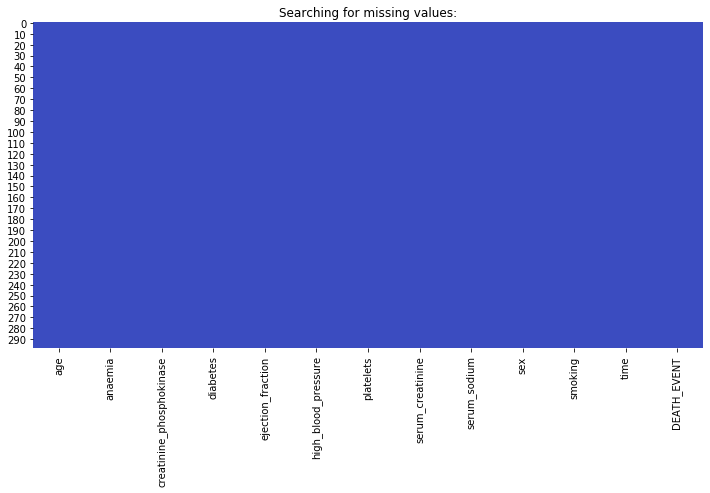

In [7]:
plt.figure(figsize=(12,6))
plt.title('Searching for missing values:')
sns.heatmap(data=df.isnull(),cmap = 'coolwarm', cbar = False)

In [8]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


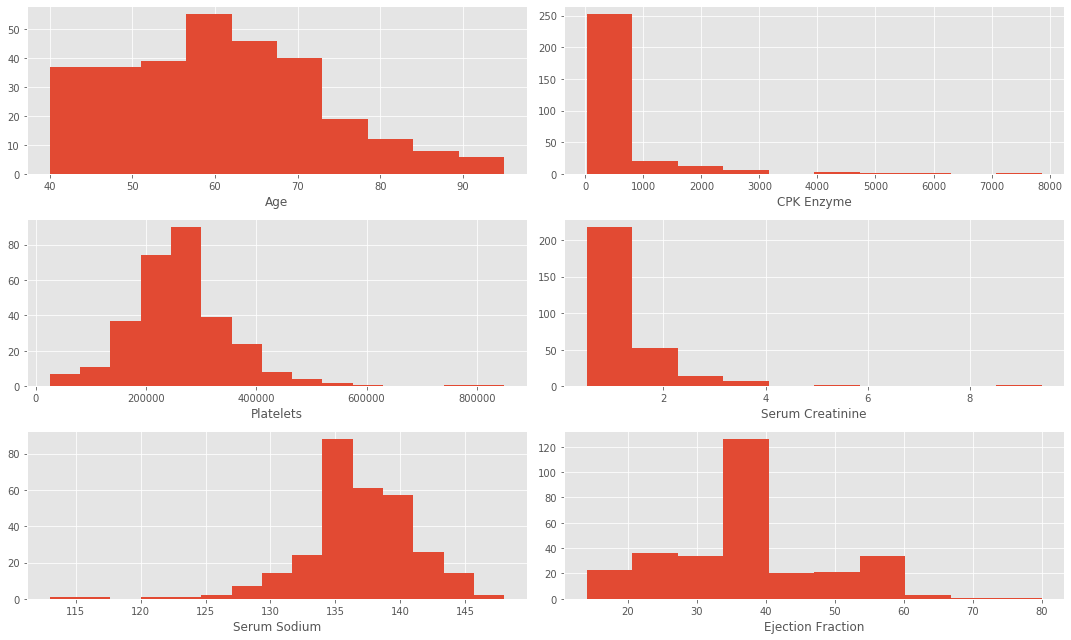

In [9]:
plt.style.use('ggplot')
fig, axis  = plt.subplots(nrows = 3, ncols = 2, figsize = (15,9))

ax0, ax1, ax2, ax3, ax4, ax5 = axis.flatten()

ax0.hist(df['age'])
ax0.set_xlabel('Age')

ax1.hist(df['creatinine_phosphokinase'])
ax1.set_xlabel('CPK Enzyme')

ax2.hist(df['platelets'], bins = 15)
ax2.set_xlabel('Platelets')

ax3.hist(df['serum_creatinine'])
ax3.set_xlabel('Serum Creatinine')

ax4.hist(df['serum_sodium'], bins = 15)
ax4.set_xlabel('Serum Sodium')

ax5.hist(df['ejection_fraction'])
ax5.set_xlabel('Ejection Fraction')

plt.tight_layout()

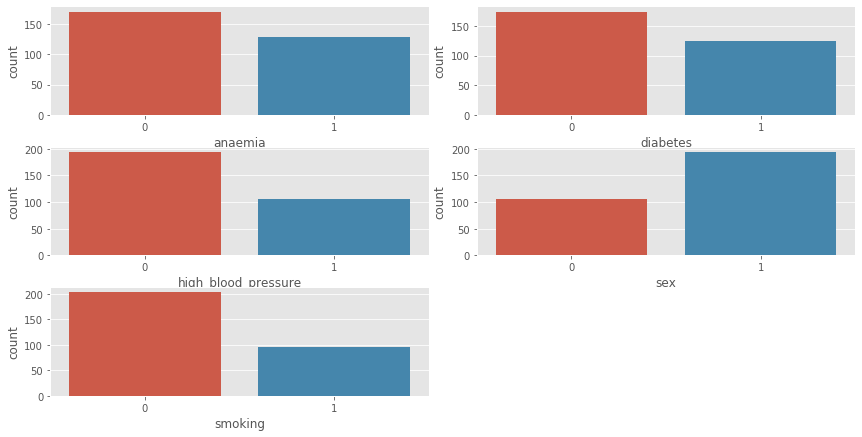

In [10]:
# distributions of the categorical variables

fig, ax  = plt.subplots(nrows = 3, ncols = 2, figsize = (12,6))
plt.tight_layout()
sns.countplot(df['anaemia'], ax=ax[0,0])
sns.countplot(df['diabetes'], ax=ax[0,1])
sns.countplot(df['high_blood_pressure'], ax=ax[1,0])
sns.countplot(df['sex'], ax=ax[1,1])
sns.countplot(df['smoking'], ax=ax[2,0])
fig.delaxes(ax[2,1])

In [12]:
# % of patients that fall under each
# 64% for sex must be male

x1 = (len(df[df['anaemia'] == 1]))/len(df['anaemia'])
x2 = (len(df[df['diabetes'] == 1]))/len(df['diabetes'])
x3 = (len(df[df['high_blood_pressure'] == 1]))/len(df['high_blood_pressure'])
x4 = (len(df[df['sex'] == 1]))/len(df['sex'])
x5 = (len(df[df['smoking'] == 1]))/len(df['smoking'])

data = {'Anaemia': x1, 'Diabetes': x2, 'High Blood Pressure': x3, 'Sex': x4, 
       'Smoking': x5}
categ_zeros = pd.DataFrame(data, index=[1])
categ_zeros

,Anaemia,Diabetes,High Blood Pressure,Sex,Smoking
1,0.431438,0.41806,0.351171,0.648829,0.32107


In [13]:
# Analyzing relationships between survival and categorical variables via grouping

df[['sex', 'DEATH_EVENT']].groupby(['sex'], as_index = False).mean()

,sex,DEATH_EVENT
0,0,0.323810
1,1,0.319588


In [14]:
df[['smoking', 'DEATH_EVENT']].groupby(['smoking'], as_index = False).mean()

,smoking,DEATH_EVENT
0,0,0.325123
1,1,0.312500


In [17]:
df[['anaemia', 'DEATH_EVENT']].groupby(['anaemia'], as_index = False).mean()

,diabetes,DEATH_EVENT
0,0,0.321839
1,1,0.320000


In [16]:
df[['diabetes', 'DEATH_EVENT']].groupby(['diabetes'], as_index = False).mean()

,diabetes,DEATH_EVENT
0,0,0.321839
1,1,0.320000


In [18]:
df[['high_blood_pressure', 'DEATH_EVENT']].groupby(['high_blood_pressure'], as_index = False).mean()

,high_blood_pressure,DEATH_EVENT
0,0,0.293814
1,1,0.371429


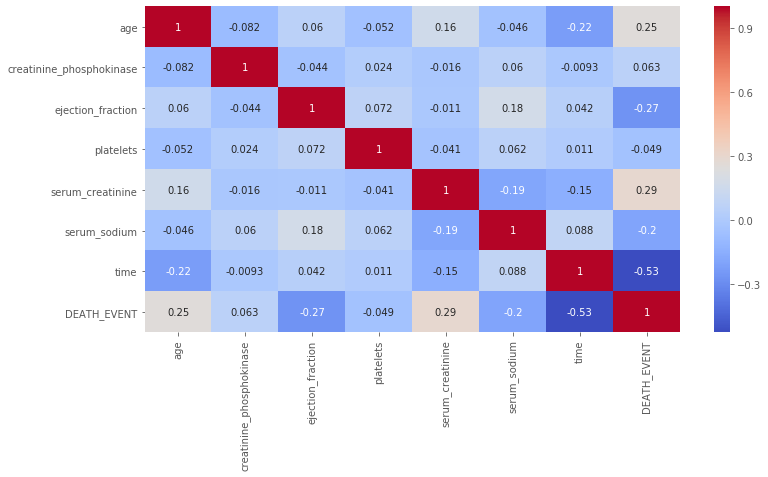

In [20]:
# heatmap 
plt.figure(figsize = (12,6))
sns.heatmap(df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time', 'DEATH_EVENT']].corr(), cmap = 'coolwarm', annot = True)

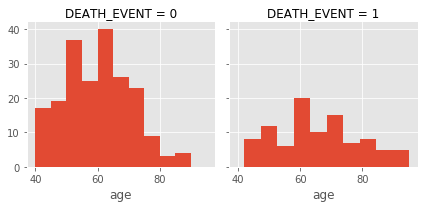

In [21]:
g = sns.FacetGrid(df, col = 'DEATH_EVENT')
g.map(plt.hist, 'age')

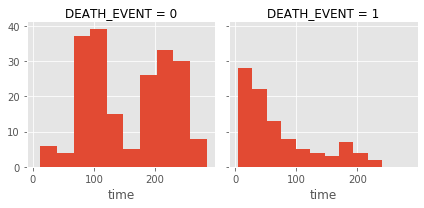

In [22]:
g = sns.FacetGrid(df, col = 'DEATH_EVENT')
g.map(plt.hist, 'time')

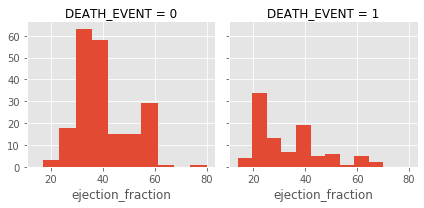

In [23]:
g = sns.FacetGrid(df, col = 'DEATH_EVENT')
g.map(plt.hist, 'ejection_fraction')

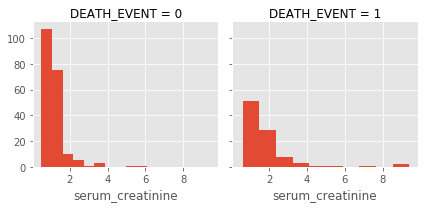

In [24]:
g = sns.FacetGrid(df, col = 'DEATH_EVENT')
g.map(plt.hist, 'serum_creatinine')

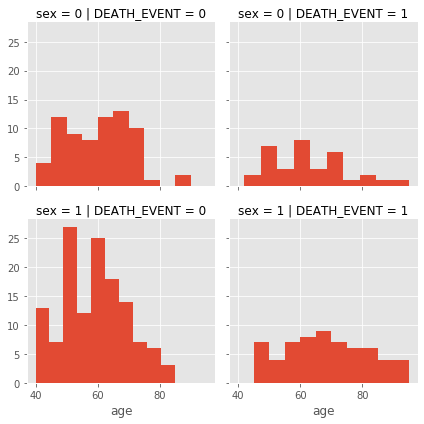

In [25]:
# relationships between categorical and numerical variables
g = sns.FacetGrid(df, col = 'DEATH_EVENT', row = 'sex')
g.map(plt.hist, 'age')

In [26]:
# dropping unrelated features 
print("Before", df.shape)
df = df.drop(['platelets', 'creatinine_phosphokinase', 'serum_sodium', 'sex', 'smoking'], axis = 1)
print("After", df.shape)

Before (299, 13)
After (299, 8)


In [27]:
# creating a new column columnindicating whether a patient has any underlying condition whether it be anemia, high blood pressure or diabetes. 
df['UnderCon'] = 0
df.loc[((df['anaemia'] == 1) | (df['diabetes'] == 1) | df['high_blood_pressure'] == 1), 'UnderCon'] = 1
df.drop(['anaemia', 'diabetes', 'high_blood_pressure'], axis = 1, inplace = True)
df.head()

,age,ejection_fraction,serum_creatinine,time,DEATH_EVENT,UnderCon
0,75.0,20,1.9,4,1,1
1,55.0,38,1.1,6,1,0
2,65.0,20,1.3,7,1,0
3,50.0,20,1.9,7,1,1
4,65.0,20,2.7,8,1,1


In [28]:
df.shape

(299, 6)

In [29]:
df[['DEATH_EVENT', 'UnderCon']].groupby('UnderCon', as_index = False).mean()

,UnderCon,DEATH_EVENT
0,0,0.283582
1,1,0.331897


In [30]:
df = df.drop('UnderCon', axis = 1)

In [31]:
df.head()

,age,ejection_fraction,serum_creatinine,time,DEATH_EVENT
0,75.0,20,1.9,4,1
1,55.0,38,1.1,6,1
2,65.0,20,1.3,7,1
3,50.0,20,1.9,7,1
4,65.0,20,2.7,8,1


Text(0.5, 1, 'time')

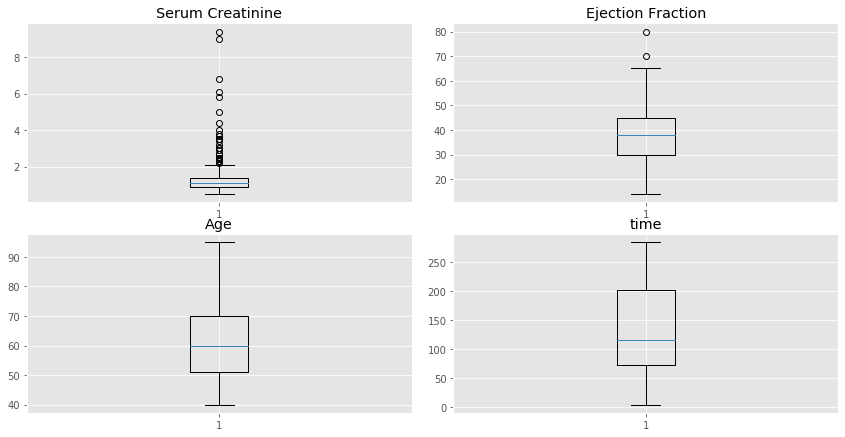

In [32]:
# removing outliers

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,6))
plt.tight_layout()

ax0,ax1,ax2,ax3 = ax.flatten()

ax0.boxplot(df['serum_creatinine'])
ax0.set_title('Serum Creatinine')

ax1.boxplot(df['ejection_fraction'])
ax1.set_title('Ejection Fraction')

ax2.boxplot(df['age'])
ax2.set_title('Age')

ax3.boxplot(df['time'])
ax3.set_title('time')

In [33]:
serum_cmode = df['serum_creatinine'].median()
df.loc[(df['serum_creatinine'] > 4), 'serum_creatinine'] = serum_cmode
df.head(10)

,age,ejection_fraction,serum_creatinine,time,DEATH_EVENT
0,75.0,20,1.9,4,1
1,55.0,38,1.1,6,1
2,65.0,20,1.3,7,1
3,50.0,20,1.9,7,1
4,65.0,20,2.7,8,1
5,90.0,40,2.1,8,1
6,75.0,15,1.2,10,1
7,60.0,60,1.1,10,1
8,65.0,65,1.5,10,1
9,80.0,35,1.1,10,1


In [34]:
df['AgeBand'] = pd.cut(df['age'],5)
df[['AgeBand', 'DEATH_EVENT']].groupby('AgeBand', as_index = False).mean()

,AgeBand,DEATH_EVENT
0,"(39.945, 51.0]",0.256410
1,"(51.0, 62.0]",0.273684
2,"(62.0, 73.0]",0.294118
3,"(73.0, 84.0]",0.555556
4,"(84.0, 95.0]",0.714286


In [35]:
#Mapping:

df.loc[df['age'] <= 51, 'age'] = 0
df.loc[(df['age'] > 51) & (df['age'] <= 62), 'age'] = 1
df.loc[(df['age'] > 62) & (df['age'] <= 73), 'age'] = 2
df.loc[(df['age'] > 73) & (df['age'] <= 84), 'age'] = 3
df.loc[(df['age'] > 84) & (df['age'] <= 95), 'age'] = 4

df.drop('AgeBand', axis = 1, inplace = True)

In [36]:
df['TimeBand'] = pd.cut(df['time'],5)
df[['TimeBand', 'DEATH_EVENT']].groupby('TimeBand', as_index = False).mean()

,TimeBand,DEATH_EVENT
0,"(3.719, 60.2]",0.857143
1,"(60.2, 116.4]",0.250000
2,"(116.4, 172.6]",0.289474
3,"(172.6, 228.8]",0.102941
4,"(228.8, 285.0]",0.047619


In [37]:
#Mapping:

df.loc[df['time'] <= 60.2, 'time'] = 0
df.loc[(df['time'] > 60.2) & (df['time'] <= 116.4), 'time'] = 1
df.loc[(df['time'] > 116.4) & (df['time'] <= 172.6), 'time'] = 2
df.loc[(df['time'] > 172.6) & (df['time'] <= 228.8), 'time'] = 3
df.loc[(df['time'] > 228.8) & (df['time'] <= 285), 'time'] = 4

df.drop('TimeBand', axis = 1, inplace = True)

In [38]:
df['SCBand'] = pd.cut(df['serum_creatinine'],5)
df[['SCBand', 'DEATH_EVENT']].groupby('SCBand', as_index = False).mean()

,SCBand,DEATH_EVENT
0,"(0.496, 1.2]",0.229268
1,"(1.2, 1.9]",0.484848
2,"(1.9, 2.6]",0.666667
3,"(2.6, 3.3]",0.571429
4,"(3.3, 4.0]",0.500000


In [39]:
#Mapping:

df.loc[df['serum_creatinine'] <= 1.2, 'serum_creatinine'] = 0
df.loc[(df['serum_creatinine'] > 1.2) & (df['serum_creatinine'] <= 1.9), 'serum_creatinine'] = 1
df.loc[(df['serum_creatinine'] > 1.9) & (df['serum_creatinine'] <= 2.6), 'serum_creatinine'] = 2
df.loc[(df['serum_creatinine'] > 2.6) & (df['serum_creatinine'] <= 3.3), 'serum_creatinine'] = 3
df.loc[(df['serum_creatinine'] > 3.3) & (df['serum_creatinine'] <= 4), 'serum_creatinine'] = 4

df.drop('SCBand', axis = 1, inplace = True)

In [40]:
df['EJBand'] = pd.cut(df['ejection_fraction'],5)
df[['EJBand', 'DEATH_EVENT']].groupby('EJBand', as_index = False).mean()

,EJBand,DEATH_EVENT
0,"(13.934, 27.2]",0.644068
1,"(27.2, 40.4]",0.243750
2,"(40.4, 53.6]",0.268293
3,"(53.6, 66.8]",0.189189
4,"(66.8, 80.0]",0.500000


In [41]:
#Mapping:

df.loc[df['ejection_fraction'] <= 27.2, 'ejection_fraction'] = 0
df.loc[(df['ejection_fraction'] > 27.2) & (df['ejection_fraction'] <= 40.4), 'ejection_fraction'] = 1
df.loc[(df['ejection_fraction'] > 40.4) & (df['ejection_fraction'] <= 53.6), 'ejection_fraction'] = 2
df.loc[(df['ejection_fraction'] > 53.6) & (df['ejection_fraction'] <= 66.8), 'ejection_fraction'] = 3
df.loc[(df['ejection_fraction'] > 66.8) & (df['ejection_fraction'] <= 80), 'ejection_fraction'] = 4

df.drop('EJBand', axis = 1, inplace = True)

In [42]:
#Converting age and serum creatinine to integers:
df['age'] = df['age'].astype(int)
df['serum_creatinine'] = df['serum_creatinine'].astype(int)
df.head()

,age,ejection_fraction,serum_creatinine,time,DEATH_EVENT
0,3,0,1,0,1
1,1,1,0,0,1
2,2,0,1,0,1
3,0,0,1,0,1
4,2,0,3,0,1


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [44]:
train, test = train_test_split(df, test_size = 0.2, random_state = 42)
print(train.head())
print('_'*40)
print(test.head())

     age  ejection_fraction  serum_creatinine  time  DEATH_EVENT
6      3                  0                 0     0            1
183    3                  1                 2     2            1
185    1                  1                 1     2            1
146    1                  1                 0     1            0
30     4                  1                 1     0            1
________________________________________
     age  ejection_fraction  serum_creatinine  time  DEATH_EVENT
281    2                  1                 3     4            0
265    0                  1                 0     4            0
164    0                  1                 0     2            1
9      3                  1                 0     0            1
77     0                  1                 0     1            0


In [45]:
X_train = train.drop('DEATH_EVENT', axis = 1)
Y_train = train['DEATH_EVENT']
X_test = test.drop('DEATH_EVENT', axis=1).copy()
Y_test = test['DEATH_EVENT']

X_train.shape,Y_train.shape,X_test.shape, Y_test.shape

((239, 4), (239,), (60, 4), (60,))

In [46]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

acc_log_train = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log_test = round(accuracy_score(Y_pred, Y_test) * 100,2)

print('Training Score:',acc_log_train,'%')
print('-'*25)
print('Test Score:',acc_log_test,'%')

Training Score: 86.19 %
-------------------------
Test Score: 76.67 %


C:\Users\Tyler\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [47]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)

acc_svc_train = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc_test = round(accuracy_score(Y_pred, Y_test) * 100,2)

print('Training Score:',acc_svc_train,'%')
print('-'*25)
print('Test Score:',acc_svc_test,'%')

Training Score: 89.54 %
-------------------------
Test Score: 73.33 %


C:\Users\Tyler\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Minimum error:- 0.23333333333333334 at K = 11


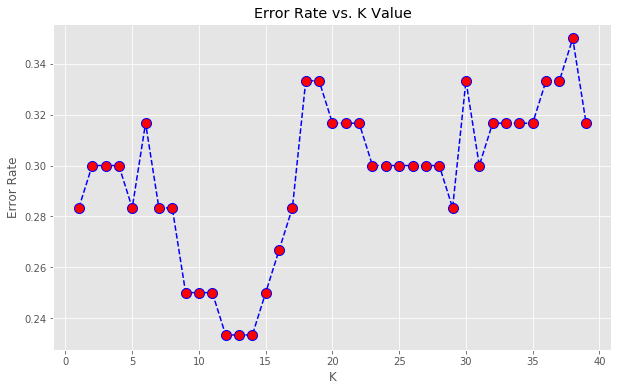

In [48]:
# K Nearest-Neighhbours (KNN)
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [49]:
# # K Nearest-Neighhbours (KNN)
knn = KNeighborsClassifier(n_neighbors = error_rate.index(min(error_rate)))
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

acc_knn_train = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn_test = round(accuracy_score(Y_pred, Y_test) * 100,2)

print('Training Score:',acc_knn_train,'%')
print('-'*25)
print('Test Score:',acc_knn_test,'%')

Training Score: 86.61 %
-------------------------
Test Score: 75.0 %


In [50]:
# Gaussian Naive-Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)

acc_gaussian_train = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian_test = round(accuracy_score(Y_pred, Y_test) * 100,2)

print('Training Score:',acc_gaussian_train,'%')
print('-'*25)
print('Test Score:',acc_gaussian_test,'%')

Training Score: 81.59 %
-------------------------
Test Score: 75.0 %


In [51]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)

acc_perceptron_train = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron_test = round(accuracy_score(Y_pred, Y_test) * 100,2)

print('Training Score:',acc_perceptron_train,'%')
print('-'*25)
print('Test Score:',acc_perceptron_test,'%')

Training Score: 78.24 %
-------------------------
Test Score: 75.0 %


In [52]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)

acc_linear_svc_train = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc_test = round(accuracy_score(Y_pred, Y_test) * 100,2)

print('Training Score:',acc_linear_svc_train,'%')
print('-'*25)
print('Test Score:',acc_linear_svc_test,'%')

Training Score: 85.36 %
-------------------------
Test Score: 78.33 %


In [53]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

acc_sgd_train = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd_test = round(accuracy_score(Y_pred, Y_test) * 100,2)

print('Training Score:',acc_sgd_train,'%')
print('-'*25)
print('Test Score:',acc_sgd_test,'%')

Training Score: 84.52 %
-------------------------
Test Score: 75.0 %


In [54]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)

acc_decision_tree_train = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree_test = round(accuracy_score(Y_pred, Y_test) * 100,2)

print('Training Score:',acc_decision_tree_train,'%')
print('-'*25)
print('Test Score:',acc_decision_tree_test,'%')

Training Score: 94.14 %
-------------------------
Test Score: 73.33 %


In [55]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)

acc_random_forest_train = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest_test = round(accuracy_score(Y_pred, Y_test) * 100,2)

print('Training Score:',acc_random_forest_train,'%')
print('-'*25)
print('Test Score:',acc_random_forest_test,'%')

Training Score: 94.14 %
-------------------------
Test Score: 73.33 %


In [56]:
# Score under the training set

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc_train, acc_knn_train, acc_log_train, 
              acc_random_forest_train, acc_gaussian_train, acc_perceptron_train, 
              acc_sgd_train, acc_linear_svc_train, acc_decision_tree_train]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,94.14
8,Decision Tree,94.14
0,Support Vector Machines,89.54
1,KNN,86.61
2,Logistic Regression,86.19
7,Linear SVC,85.36
6,Stochastic Gradient Decent,84.52
4,Naive Bayes,81.59
5,Perceptron,78.24


In [57]:
# Score under the test set

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc_test, acc_knn_test, acc_log_test, 
              acc_random_forest_test, acc_gaussian_test, acc_perceptron_test, 
              acc_sgd_test, acc_linear_svc_test, acc_decision_tree_test]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Linear SVC,78.33
2,Logistic Regression,76.67
1,KNN,75.00
4,Naive Bayes,75.00
5,Perceptron,75.00
6,Stochastic Gradient Decent,75.00
0,Support Vector Machines,73.33
3,Random Forest,73.33
8,Decision Tree,73.33
